In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML

# Bayes' Theorem For Distributions

```{margin}
These sections continue to draw on [Think Bayes](https://greenteapress.com/wp/think-bayes) by Allen B. Downey.
```

So far we have been applying Bayes' Theorem to random variables.   

For example, we've looked at the cookie problem, where we studied:

$$P(\text{First Bowl}) \\\text{and}\\P(\text{First Bowl}\,|\,\text{Data})$$

```{margin} 
Image credit: DALL-E, prompt: "two bowls of cookies, one containing more vanilla cookies than the other"
```

<center>
    
<img src="images/DALLE-2023-03-08-14.00.24-two-bowls-of-cookies,-one-containing-more-vanilla-cookies-than-the-other.png" width="400px">
    
</center>

Now, it's useful to think about random variables in terms of their distributions.   

Today we'll shift our focus to applying Bayes' Theorem to the distributions themselves.

## Review of Distributions

As you will recall, a [**distribution**](./02-Distributions.html#Distributions) is a set of possible outcomes and their corresponding probabilities. 

The probability mass function (or PMF) is the probability of each discrete outcome. 

We looked at some examples of distributions before, for example, the [Binomial Distribution](./02-Distributions.html#the-binomial-distribution) and the [Uniform Distribution](./02-Distributions.html#the-uniform-distribution):

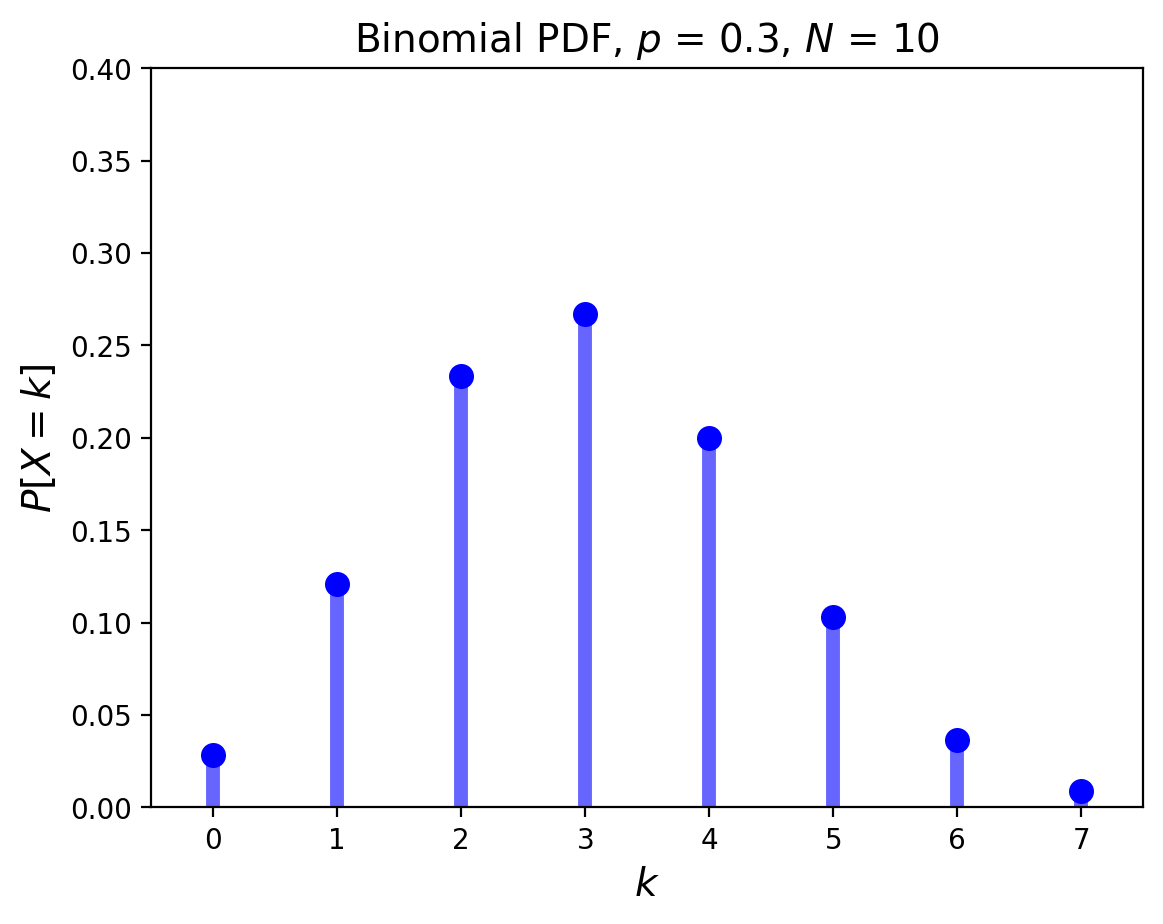

In [2]:
from scipy.stats import binom
p = 0.3
x = np.arange(binom.ppf(0.01, 10, p), binom.ppf(0.9995, 10, p))
plt.ylim([0, 0.4])
plt.xlim([-0.5, max(x)+0.5])
plt.plot(x, binom.pmf(x, 10, p), 'bo', ms=8, label = 'binom pmf')
plt.vlines(x, 0, binom.pmf(x, 10, p), colors='b', lw = 5, alpha=0.6)
plt.title(f'Binomial PDF, $p$ = {p}, $N$ = 10', size=14)
plt.xlabel(r'$k$', size=14)
plt.ylabel(r'$P[X = k]$', size=14);

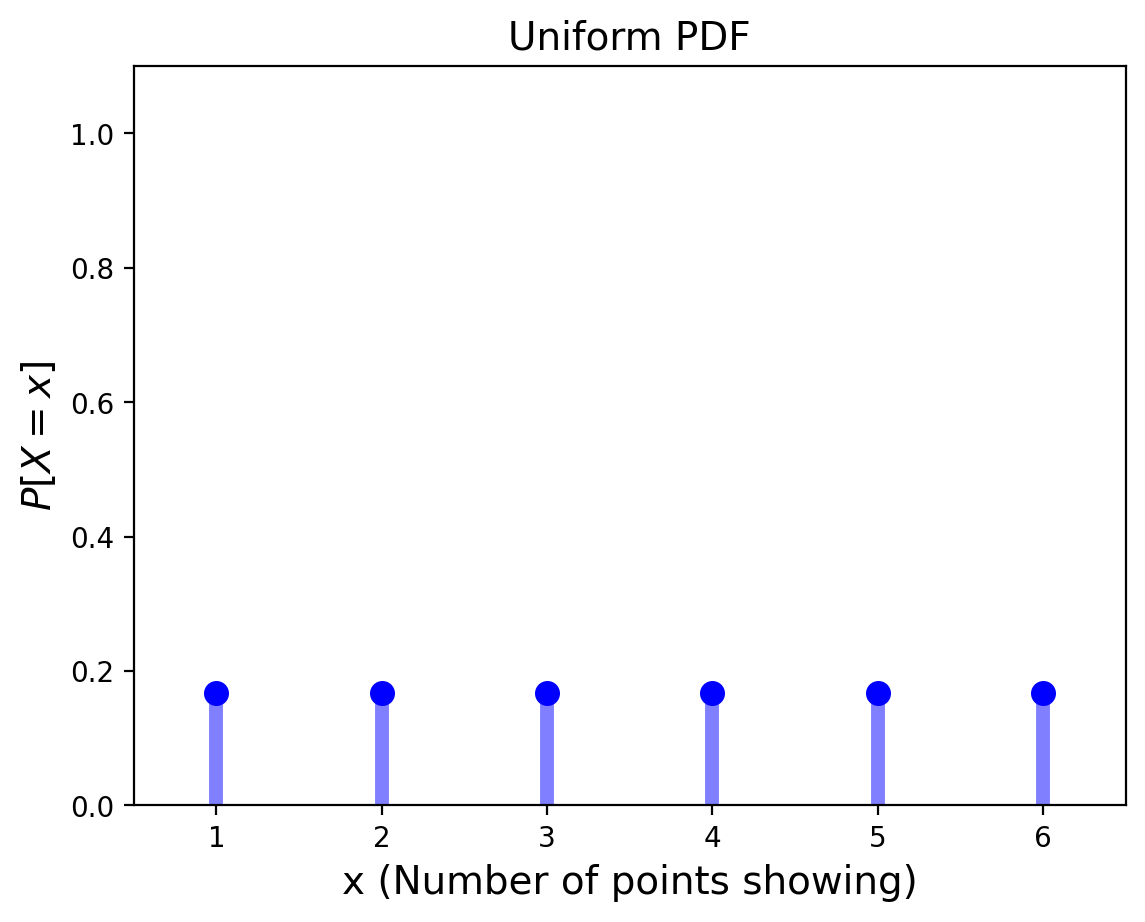

In [3]:
plt.figure()
x = np.arange(1, 7)
plt.plot(x, 6*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([0.5, 6.5])
plt.ylim([0, 1.1])
plt.title(f'Uniform PDF', size=14)
plt.xlabel(r'x (Number of points showing)', size=14)
plt.ylabel(r'$P[X = x]$', size=14);

If you think back to the Bayes tables from the previous lectures, this may actually seem very familiar to you. 

The priors in our table were a distribution!

## Prior and Posterior Distributions

The set of **prior probabilities** are in reality a **prior distribution**.

Likewise, the set of **posterior probabilities** are in reality a **posterior distribution** across hypotheses. 

Let's reformulate the cookie problem using distributions.

We're going to use a uniform probability distribution as a prior (a "**uniform prior**"):

In [4]:
from scipy.stats import randint
distribution = pd.DataFrame(index=['first bowl', 'second bowl'])
#uniform prior distribution
distribution['probs'] = randint(1, 3).pmf(np.arange(1,3)) 
distribution

,probs
first bowl,0.5
second bowl,0.5


In other words:

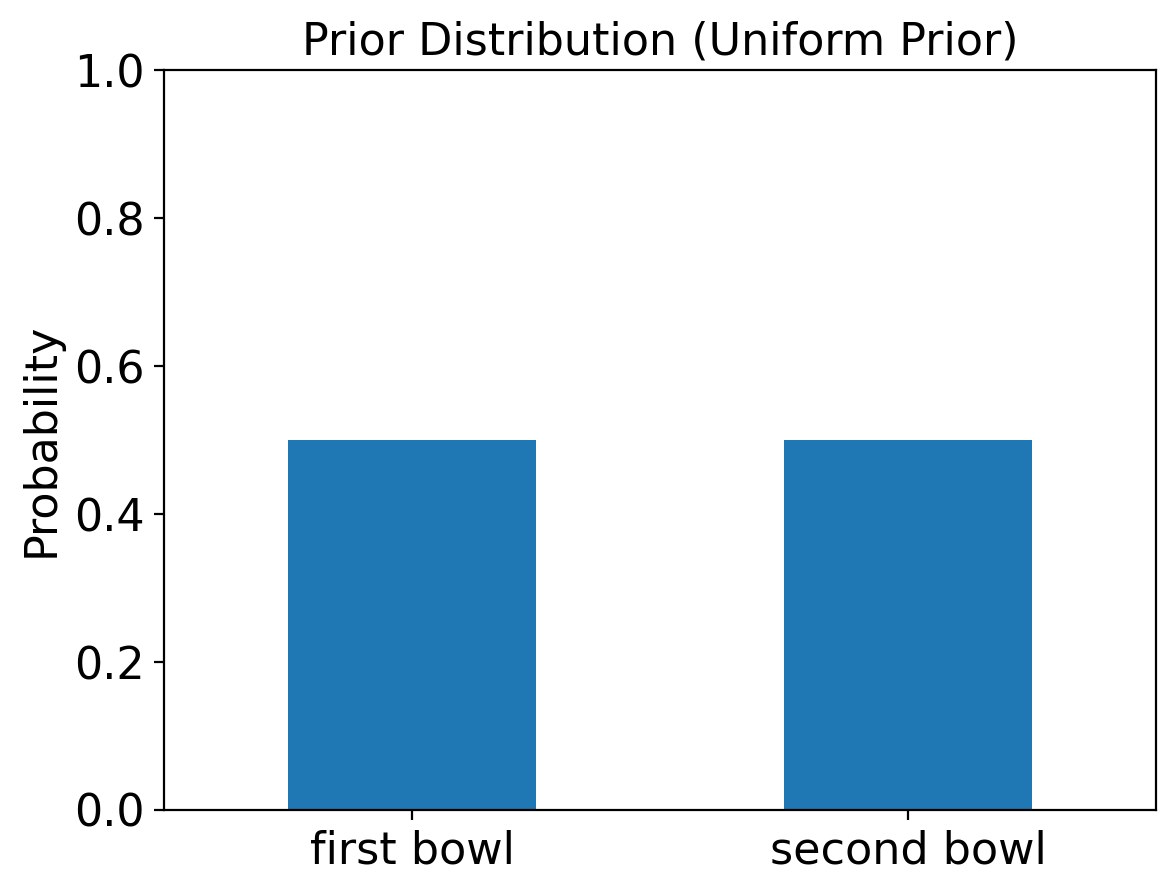

In [5]:
fig, ax = plt.subplots()
distribution.plot(kind = 'bar', ax = ax, ylim = [0, 1], legend = False, ylabel = 'Probability', fontsize = 16)
plt.xticks(rotation='horizontal')
ax.yaxis.label.set_fontsize(16)
plt.title('Prior Distribution (Uniform Prior)', size = 16);

We see that this gives us the exact same prior probabilities as before. 

Now let's introduce an update function like before, but this time it updates our probability distribution based on likelihoods:

In [6]:
def update(distribution, likelihood):
    '''perform a Bayesian update on distribution using likelihood'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

Let's see what the posterior pobabilities of both bowls are if we draw a vanilla cookie.

We write the calculation like this:

$$ P(H\,\vert\,D) = \frac{P(H) \cdot P(D\,\vert\,H)}{P(D)}. $$

This of this as updating the __distribution__ from $P(H)$ to $P(H\,\vert\,D).$

And we compute it like this:

In [7]:
likelihood_vanilla = [0.75, 0.5]
update(distribution, likelihood_vanilla)

,probs
first bowl,0.6
second bowl,0.4


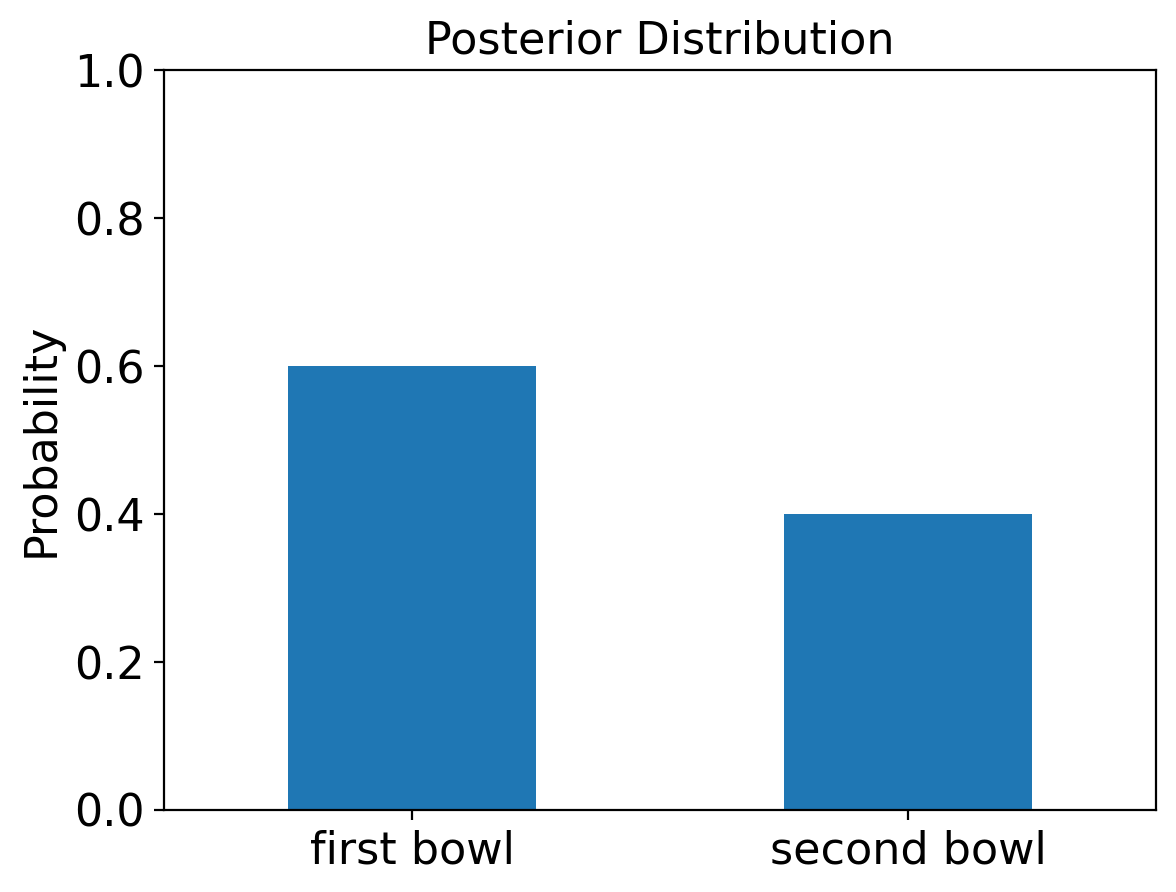

In [8]:
old_posterior = distribution.copy()
fig, ax = plt.subplots()
distribution.plot(kind = 'bar', ax = ax, ylim = [0, 1], legend = False, ylabel = 'Probability', fontsize = 16)
plt.xticks(rotation='horizontal')
ax.yaxis.label.set_fontsize(16)
plt.title('Posterior Distribution', size = 16);

This is our posterior distribution! As you would expect, it's the same as what we caculated using the Bayes table in our past lecture.

## Gathering More Data

One of the powerful ideas in Bayesian analysis is that if data is arriving over time, you can keep doing Bayesian updates.

Or in a different setting, you can decide to collect more data, and do another Bayesian update.

```{margin}
Image credit: DALL-E, prompt: "Two basketball teams in a close game, photorealistic"
```

<center>

<img src="images/DALL-E-2023-03-08-15.36.42-Two-basketball-teams-in-a-close-game,-photorealistic.png" width="300px">

</center>

For example, imagine you are watching a basketball game.   You want to estimate the probability of your favorite team winning.

Each time the score changes, you can do another Bayesian update!

Let's see how this works for the cookie problem.

Let's say we put the cookie back, and then pull __another__ cookie from the __same bowl__.    

Assume it turns out that it's vanilla again.

We perform another Bayesian update.  (Note that the old posteriors now become the new priors!)

In [9]:
update(distribution, likelihood_vanilla)

,probs
first bowl,0.692308
second bowl,0.307692


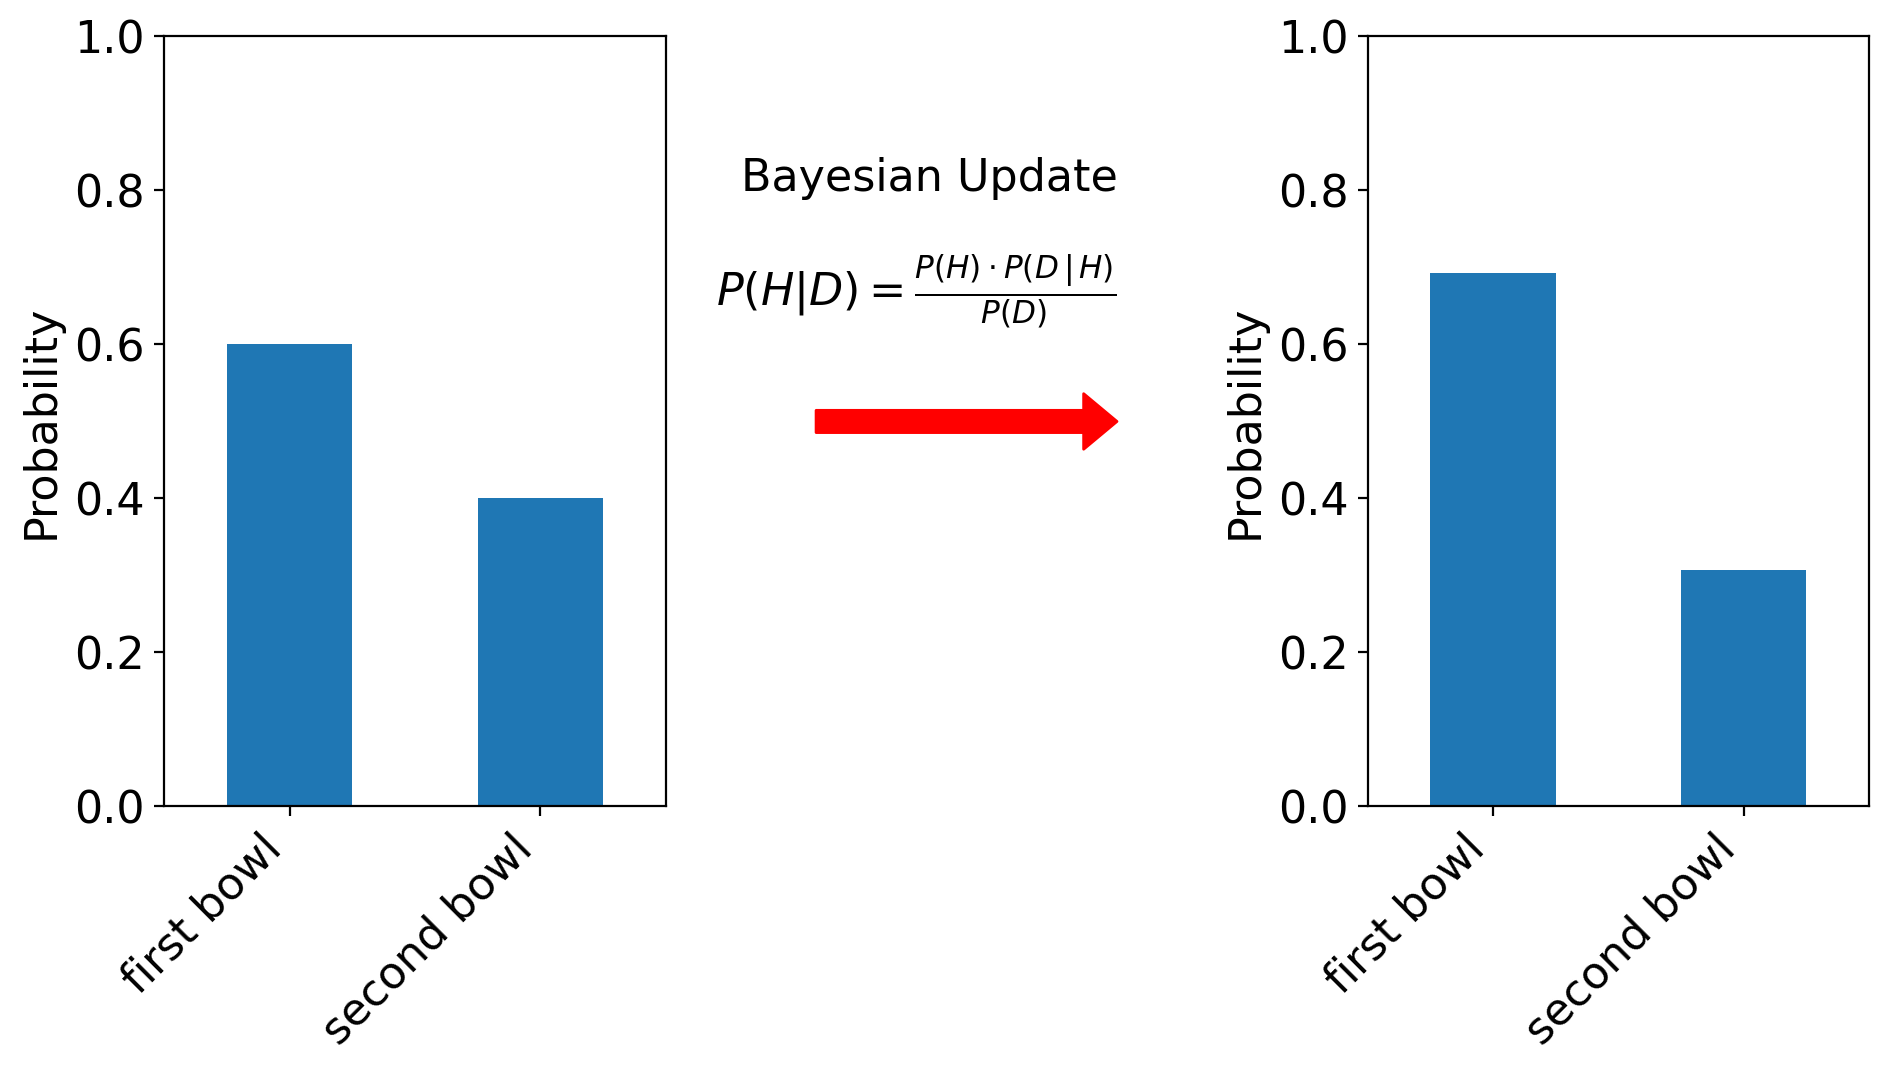

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (11, 5))
old_posterior.plot(kind = 'bar', ax = ax[0], ylim = [0, 1], legend = False, ylabel = 'Probability', fontsize = 16)
plt.setp(ax[0].get_xticklabels(), ha="right", rotation=45)
ax[0].yaxis.label.set_fontsize(16)
distribution.plot(kind = 'bar', ax = ax[2], ylim = [0, 1], legend = False, ylabel = 'Probability', fontsize = 16)
plt.setp(ax[2].get_xticklabels(), ha="right", rotation=45)
ax[2].yaxis.label.set_fontsize(16)
# turn off y axis entirely
ax[1].yaxis.set_visible(False)
# hide x axis but not its label
# ax[1].xaxis.set_major_locator(plt.NullLocator())
# turn off x axis entirely
ax[1].xaxis.set_visible(False)
# remove the "box" around the plot
for spine in ax[1].spines.values():
    spine.set_visible(False);
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[1].annotate('', xytext = [0.1, 0.5], xy = [0.7, 0.5], arrowprops = {'width': 8, 'headwidth': 20, 'color': 'red'})
ax[1].text(-0.05, 0.8, 'Bayesian Update', fontsize = 16)
ax[1].text(-0.1, 0.65, r'$P(H|D) = \frac{P(H) \cdot P(D\,\vert\,H)}{P(D)}$', fontsize = 16);

Now we're even more confident that we are drawing cookies from the first bowl!

## 101 Bowls
As we move to more complicated problems, the usefulness of reframing of the prior and posterior as distributions will become more clear.

Let's suppose we were dealing with 101 bowls instead of just 2. Like before, we'll say there's an equal probability of picking each bowl. 

This time let's say that each bowl's number is in fact the percent of its cookies that are vanilla.

So Bowl 0 is all chocolate, Bowl 1 is 1% vanilla cookies and 99% chocolate, Bowl 2 is 2% vanilla cookes and 98% chocolate, etc.

Getting started on this problem using a uniform prior distribution is no harder than it was for two bowls:

In [11]:
dist_101 = pd.DataFrame(index = np.arange(101))
# using a uniform prior distribution
dist_101['probs'] = randint(0, 101).pmf(np.arange(101)) 
dist_101

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


The likelihood of drawing a vanilla cookie from each bowl is given by the bowl number:

In [5]:
likelihood_vanilla = np.arange(101)/100

And just as before, we perform a Bayesian update by multiplying the priors by the likelihoods, then normalizing:

$$ P(H\,\vert\,D) = \frac{P(H) \cdot P(D\,\vert\,H)}{P(D)}. $$

That is:

$$ \text{Posteriors} = \frac{\text{Priors} \cdot \text{Likelihoods}}{\text{Normalizer}} $$

In [13]:
priors = dist_101.copy()
update(dist_101, likelihood_vanilla)

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
...,...
96,0.019010
97,0.019208
98,0.019406
99,0.019604


This gives us the **posterior distribution** of probabilities across bowls.

That's a lot of probabilites to look at though, so lets plot the prior (in gray) and posterior (in blue) distributions:

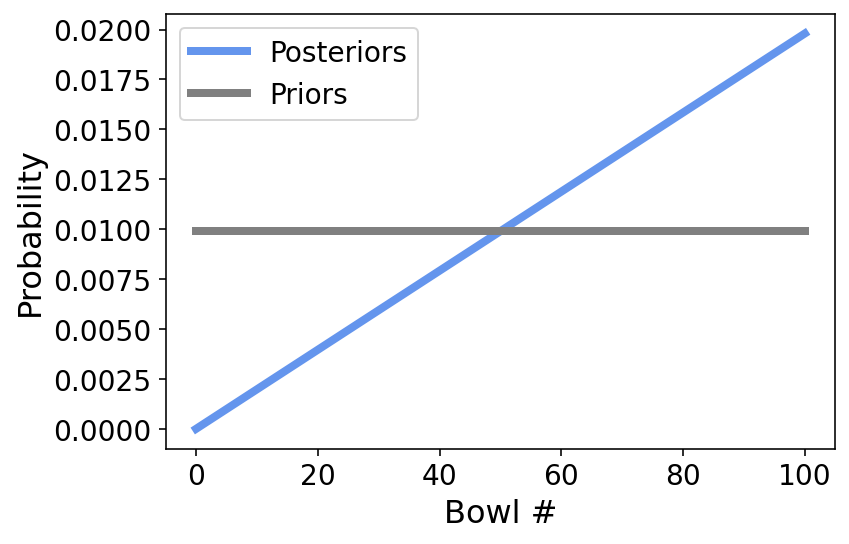

In [14]:
fig, ax = plt.subplots()
dist_101.plot(ax = ax, color = 'cornflowerblue', lw = 4, fontsize = 14)
priors.plot(ax = ax, color = 'gray', lw = 4)
ax.legend(['Posteriors', 'Priors'], fontsize = 14)
plt.xlabel('Bowl #', size = 16)
plt.ylabel('Probability', size = 16)
dist_101_1_update = dist_101.copy();

This gives us a good way to understand the prior and posterior distributions. 

The prior was uniform, and as we can see, each bowl has an equal probability of being our chosen bowl.

The posterior probability increases with bowl number, which is what we would expect since each higher bowl number has a higher percentage of vanilla cookies.

We can see that the probability we drew our cookie from Bowl 1 is very small -- almost zero.

And the most likely Bowl is Bowl 100, which makes sense since that bowl is 100\% Vanilla cookies.

What happens if we draw another vanilla cookie out of the __same__ bowl? 

The answer is obtained by simply performing another Bayesian update.

Let's update the probabilities and plot the new posterior:

In [15]:
update(dist_101, likelihood_vanilla);

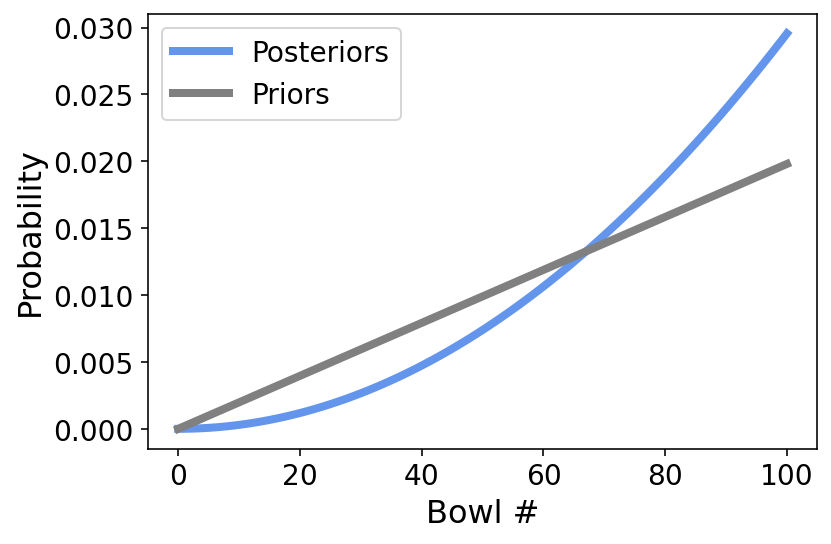

In [16]:
fig, ax = plt.subplots()
dist_101.plot(ax = ax, color = 'cornflowerblue', lw = 4, fontsize = 14)
dist_101_1_update.plot(ax = ax, color = 'gray', lw = 4)
ax.legend(['Posteriors', 'Priors'], fontsize = 14)
plt.xlabel('Bowl #', size = 16)
plt.ylabel('Probability', size = 16)
dist_101_2_updates = dist_101.copy();

Now the small numbered bowls are even less likely, and the high numbered bowls are even more likely.

OK.  Now let's make things more interesting.    What if our next draw from that same bowl were a __chocolate__ cookie?

In [17]:
likelihood_chocolate = 1 - likelihood_vanilla
update(dist_101, likelihood_chocolate);

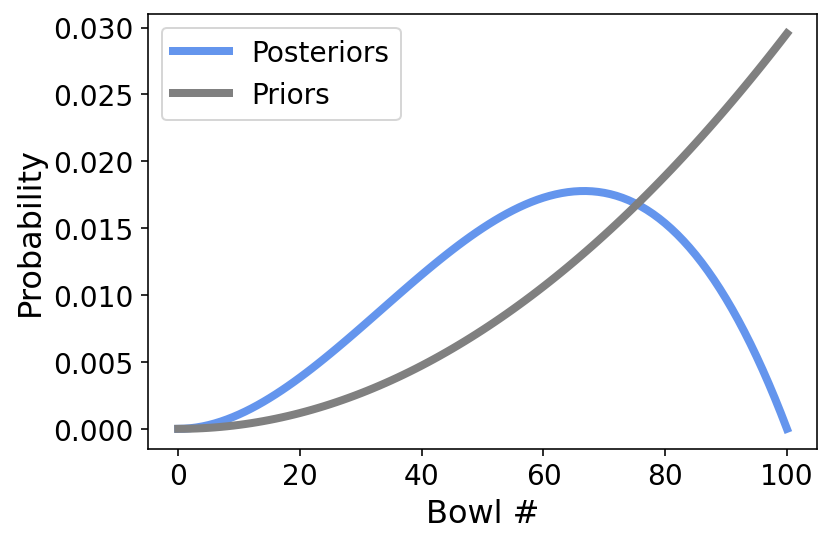

In [18]:
fig, ax = plt.subplots()
dist_101.plot(ax = ax, color = 'cornflowerblue', lw = 4, fontsize = 14)
dist_101_2_updates.plot(ax = ax, color = 'gray', lw = 4)
ax.legend(['Posteriors', 'Priors'], fontsize = 14)
plt.xlabel('Bowl #', size = 16)
plt.ylabel('Probability', size = 16)
dist_101_3_updates = dist_101.copy();

Now things look quite different!

Our bowl can't be bowl number 100 anymore because that one had no chocolate cookies at all.  So we have zero probability for Bowl 100.

But it's still more likely to be a higher-numbered bowl, because we have drawn more vanilla cookies (two) than chocolate cookies (one).

The highest point in the posterior distribution is the __most likely__ bowl.   Which bowl is most likely?

In [19]:
dist_101['probs'].idxmax()

67

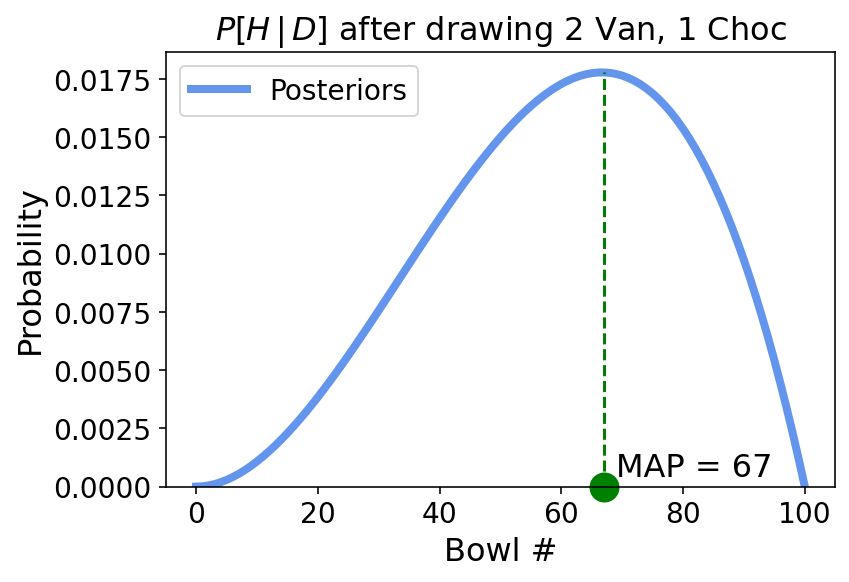

In [20]:
fig, ax = plt.subplots()
dist_101.plot(ax = ax, color = 'cornflowerblue', lw = 4, fontsize = 14)
ax.legend(['Posteriors'], fontsize = 14)
plt.xlabel('Bowl #', size = 16)
plt.ylabel('Probability', size = 16)
map = dist_101['probs'].idxmax()
ymin = dist_101['probs'].min()
ax.set_ylim(ymin = ymin)
plt.vlines(x = map, ymin = ymin, ymax = dist_101['probs'].max(), linestyles = 'dashed', color = 'g')
plt.plot(map, ymin, 'o', color = 'g', markersize = 14, clip_on = False)
plt.text(map+2, ymin+0.00015, r'MAP = 67', size = 16, ha = 'left', va = 'bottom')
plt.title(r'$P[H\,\vert\,D]$ after drawing 2 Van, 1 Choc', size = 16);

Bowl 67 is the most likely bowl.

This bowl has the "**maximum a posteriori** probability" which is the name we give to the __event with the highest posterior probability.__

The term **maximum a posteriori** is usually appreviated as **MAP**.

### Choosing a Bowl, or Choosing a Distribution?

Now, notice that the maximum a posteriori bowl is the one that is closest to 2/3 vanilla and 1/3 chocolate.

This is not a coincidence!

When we start from a uniform prior, the most likely bowl is the one whose cookie proportions most closely match our data.

That is, by choosing a bowl, we have also chosen a distribution.

This brings us closer to how Bayesian reasoning is used in statistics.

Consider: the example with 101 different bowls might seem a bit strange, but it's actually exactly equivalent to a more typical question:

>Imagine that you have one bowl of cookies. You don’t know what fraction of cookies are vanilla, but you think it is equally likely to be any fraction from 0 to 1. If you draw three cookies and two are vanilla, what proportion of cookies in the bowl do you think are vanilla?

The posterior distribution we calculated for 101 bowls is the answer for this question as well. 

Why is that?  Think about your __state of knowledge__ in the two cases 
* 100 bowls, each has a different distribution of cookies
* single bowl with a an __unknown__ distribution of cookies

Can you see that your knowledge is the same in each case?

We call this type of question "estimating proportions" which will be the subject of our next lecture.